In [1]:
import torch

In [7]:
input=torch.ones(1,1,5,5)
x=torch.nn.Conv2d(in_channels=1,out_channels=2,kernel_size=3,groups=1)
out=x(input)

In [8]:
print(type(input))

<class 'torch.Tensor'>


In [9]:
print(out.shape)
print(out)

torch.Size([1, 2, 3, 3])
tensor([[[[ 0.9958,  0.9958,  0.9958],
          [ 0.9958,  0.9958,  0.9958],
          [ 0.9958,  0.9958,  0.9958]],

         [[-0.7739, -0.7739, -0.7739],
          [-0.7739, -0.7739, -0.7739],
          [-0.7739, -0.7739, -0.7739]]]], grad_fn=<MkldnnConvolutionBackward>)


In [10]:
print(list(x.parameters()))

[Parameter containing:
tensor([[[[-0.2010,  0.0580,  0.0820],
          [-0.0537,  0.2909, -0.2748],
          [ 0.3210,  0.2988,  0.2579]]],


        [[[ 0.1304, -0.0963,  0.0936],
          [-0.3178, -0.0155, -0.2506],
          [ 0.0767,  0.0034, -0.2468]]]], requires_grad=True), Parameter containing:
tensor([ 0.2167, -0.1509], requires_grad=True)]


In [13]:
f_p=list(x.parameters())[0]
f_p=f_p.data.numpy()
print("the result of first channel in image:", f_p[0].sum()+(0.2167))

the result of first channel in image: 0.9958019678115845


In [17]:
f_p=list(x.parameters())[0]
f_p=f_p.data.numpy()
print("the result of first channel in image:", f_p[1].sum()+(-0.1509))

the result of first channel in image: -0.773887449169159


In [1]:
from fastai.vision import *
import torchsummary

In [8]:
path = Path('../../data/mnist')

In [28]:
tfms = get_transforms(do_flip=False)

In [29]:
data = (ImageList.from_folder(path)
       .split_by_folder(train='train', valid='valid')
       .label_from_folder()
       .transform(tfms)
       .databunch(bs=16, num_workers=0))

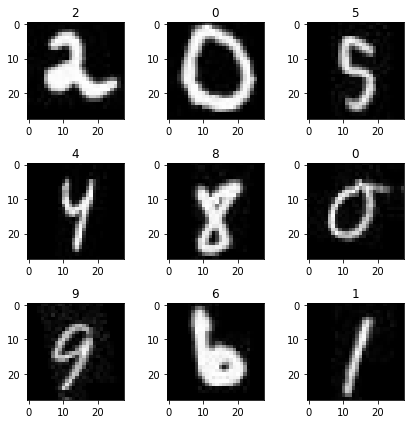

In [30]:
data.show_batch(3, figsize=(6,6), hide_axis=False)

In [34]:
model = models.vgg16_bn(pretrained=True)

In [ ]:
model.classifier = 

In [32]:
learner = cnn_learner(data, models.vgg16_bn, metrics=error_rate)
learner.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: Given input size: (512x1x1). Calculated output size: (512x0x0). Output size is too small

In [35]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print('parameters_count:',count_parameters(model))

parameters_count: 138365992


In [36]:
torchsummary.summary(model, (3, 28, 28))

RuntimeError: Given input size: (512x1x1). Calculated output size: (512x0x0). Output size is too small